In [12]:
import pandas as pd
%matplotlib inline

# Preliminaries

## Question 1

Import the file 'imdb.csv' as a dataframe. The index should be the names of the movies.

> **NOTE:** The names of the movies end with the unicode character \\xa0, which we would like to remove. To do that you should use the argument _encoding='utf-8-sig'_ and replace it with an empty string (explained [here][1]).

[1]: https://stackoverflow.com/questions/10993612/python-removing-xa0-from-string "reindex"

In [30]:
imdb = pd.read_csv('movie_metadata.csv', index_col='movie_title', encoding='utf-8-sig')
imdb.set_index(imdb.index.str.replace(u'\xa0', u''), inplace=True)
len(imdb)

5043

## Question 2

Remove duplicate records.

In [31]:
imdb.drop_duplicates(inplace=True)
len(imdb)

4998

## Question 3

Remove directors with less than two movies.

### Solution I

In [32]:
imdb = imdb.groupby('director_name').filter(lambda grp: len(grp) > 1)
len(imdb)

3382

### Solution II

In [5]:
dir_count = imdb.director_name.value_counts()
good_dirs = dir_count[dir_count > 1].index
imdb = imdb[imdb.director_name.isin(good_dirs)]
len(imdb)

3382

## Question 4

In [33]:
imdb = imdb[imdb.actor_3_name.notnull()]
len(imdb)

3375

# Warm-up questions

## Question 1

How many languages are represented?

In [7]:
imdb.language.nunique()

28

## Question 2

What is the oldest movie?

In [43]:
imdb.loc[imdb.title_year.argmin()]

color                                                          Black and White
director_name                                                       King Vidor
num_critic_for_reviews                                                      48
duration                                                                   151
director_facebook_likes                                                     54
actor_3_facebook_likes                                                       6
actor_2_name                                                      Renée Adorée
actor_1_facebook_likes                                                      81
gross                                                                      NaN
genres                                                       Drama|Romance|War
actor_1_name                                                      John Gilbert
num_voted_users                                                           4849
cast_total_facebook_likes                           

## Question 3

Who is the director with the highest average imdb score?

In [51]:
imdb.groupby('director_name')['imdb_score'].mean().argmax()

u'Sergio Leone'

## Question 4

In [52]:
imdb['profit'] = imdb['gross'] - imdb['budget']

In [53]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


In [61]:
imdb.groupby('director_name')['profit'].sum().argmax()

u'Steven Spielberg'

Add a column called ‘profits’ with gross-budget and answer:
* What is the most profitable movie and what is the biggest failure?
* Who is the most profitable director?

In [10]:
imdb['profit'] = imdb['gross'] - imdb['budget']
imdb['profit'].argmax(), imdb['profit'].argmin()

(u'Avatar', u'The Host')

In [11]:
imdb.groupby('director_name')['profit'].sum().argmax()

u'Steven Spielberg'

# Simple questions

## Question 1

What was the total budget spent on production every year? Visualize it.

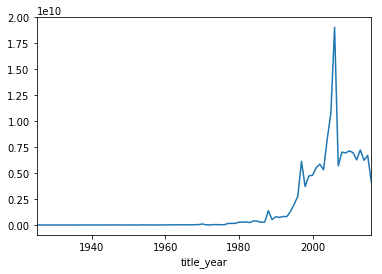

In [63]:
imdb.groupby('title_year')['budget'].sum().plot()

## Question 2

Create a dataframe with the directors as index and with two columns - 'average duration' and 'movie count'.

In [64]:
grp_dir = imdb.groupby('director_name')

In [68]:
grp_dir['duration'].mean().sort_values(ascending=False)

director_name
Ron Maxwell             275.500000
Michael Cimino          254.000000
Stanley Kramer          191.500000
David Lean              188.000000
Billy Bob Thornton      184.000000
Kevin Costner           184.000000
Yash Chopra             184.000000
Peter Jackson           170.666667
Richard Attenborough    169.250000
Taylor Hackford         169.000000
Akira Kurosawa          168.000000
Bernardo Bertolucci     162.500000
Karan Johar             160.500000
Sergio Leone            159.250000
Philip Kaufman          158.500000
James Cameron           156.857143
Francis Ford Coppola    153.181818
Frank Darabont          152.250000
Wolfgang Petersen       151.714286
Anthony Minghella       151.666667
Victor Fleming          150.000000
Stanley Kubrick         149.857143
Terrence Malick         149.500000
Shane Black             149.000000
Kenneth Lonergan        148.500000
Oliver Stone            148.428571
Quentin Tarantino       148.000000
Paul Thomas Anderson    148.000000
Michae

### Solution I

Combining two Series objects.

In [69]:
average_duration = grp_dir['duration'].mean()
movie_count = grp_dir['director_name'].count()
df = pd.DataFrame({'average duration': average_duration, 
                   'movie count': movie_count})
df.head()

,average duration,movie count
director_name,,
Adam McKay,119.166667,6
Adam Rifkin,95.000000,2
Adam Shankman,106.250000,8
Adrian Lyne,112.500000,4
Akira Kurosawa,168.000000,2


### Solution II

Using the GroupBy.agg() method.

In [71]:
df = grp_dir.agg({'duration': 'mean', 
                  'director_name': 'count'})
df.rename(columns={'duration': 'average duration', 
                   'director_name': 'movie count'}, 
          inplace=True)
df.head()

,duration,director_name
director_name,,
Adam McKay,119.166667,6
Adam Rifkin,95.000000,2
Adam Shankman,106.250000,8
Adrian Lyne,112.500000,4
Akira Kurosawa,168.000000,2


## Question 3

How many unique actors are represented? Consider all three columns.

### Solution I

Using _set()_

In [16]:
len(set(imdb.actor_1_name) | set(imdb.actor_2_name) | set(imdb.actor_3_name))

4121

### Solution II

Using _Series.nunique()_

In [17]:
imdb.actor_1_name.append([imdb.actor_2_name, imdb.actor_3_name]).nunique()

4121

## Question 4

**Part A -** How many movies were released every year? Visualize it. 

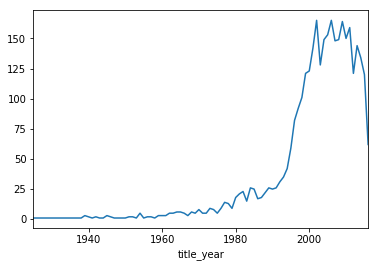

In [73]:
imdb.groupby('title_year')['director_name'].count().plot()

**Part B -** Next, separate the last graph into two plots (on the same graph) - one for color movies and one for B/W movies.

### Solution I

Make the plots one by one with _Series.plot()_ and put them on a shared _Axes_ object

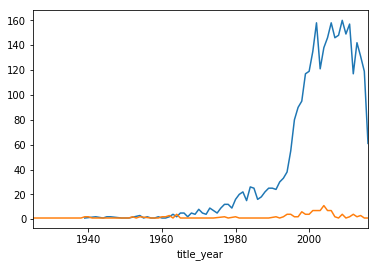

In [75]:
imdb_color = imdb[imdb.color == 'Color']
imdb_bw = imdb[imdb.color != 'Color']

ax1 = imdb_color.groupby('title_year')['director_name'].count().plot()
imdb_bw.groupby('title_year')['director_name'].count().plot(ax=ax1)

### Solution II

Using _MultiIndex_ and _DataFrame.unpack()_ to create the proper dataframe, and then using _DataFrame.plot()_.

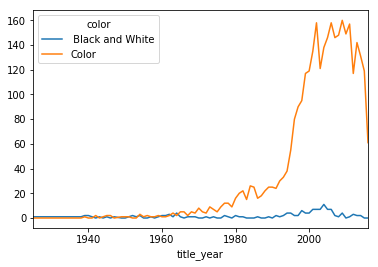

In [86]:
counts = imdb.groupby(['title_year', 'color'])['director_name'].count()
counts.unstack(fill_value=0).plot()

## Question 5

**Part A -** Who is the most prolific director (namely the average number of movies per year is the highest)?

In [21]:
def f(grp):
    return float(len(grp)) / (grp.title_year.max() - grp.title_year.min() + 1)

In [22]:
imdb.groupby('director_name').apply(f).sort_values(ascending=False).head()

director_name
Joel Edgerton        2.0
Michael O. Sajbel    2.0
Christian Alvart     2.0
Richard Schenkman    2.0
J.B. Rogers          2.0
dtype: float64

**Part B -** Repeat the question, but consider only directors with more than 15 movies.

In [23]:
imdb5 = imdb.groupby('director_name').filter(lambda grp: len(grp) > 15)
imdb5.groupby('director_name').apply(f).sort_values(ascending=False).head()

director_name
Steven Soderbergh    0.640000
Steven Spielberg     0.619048
Tim Burton           0.592593
Spike Lee            0.551724
Woody Allen          0.511628
dtype: float64

# Difficult questions

## Question 1

Which actor participated in the highest number of movies? Consider all three columns.

### Solution I

Using _DataFrame.melt()_.

In [26]:
melted_actors = pd.melt(imdb, value_vars=['actor_1_name', 'actor_2_name', 'acor_3_name'])
melted_actors['value'].value_counts().head()

Robert De Niro    45
Morgan Freeman    41
Johnny Depp       36
Bruce Willis      35
Matt Damon        33
Name: value, dtype: int64

### Solution II

Using _Series.add()_.

In [28]:
actor1 = imdb.actor_1_name.value_counts()
actor2 = imdb.actor_2_name.value_counts()
actor3 = imdb.actor_3_name.value_counts()

In [32]:
actor1.add(actor2, fill_value=0).add(actor3, fill_value=0).sort_values(ascending=False).head()

Robert De Niro    45.0
Morgan Freeman    43.0
Johnny Depp       36.0
Bruce Willis      36.0
Matt Damon        34.0
dtype: float64

### Solution III

Aligning Series objects using _Series.align()_.

In [39]:
a1, a2 = actor1.align(actor2, fill_value=0)
a1, a3 = a1.align(actor3, fill_value=0)
a2, a3 = a2.align(actor3, fill_value=0)
actors = a1 + a2 + a3
actors.sort_values(ascending=False).head()

Robert De Niro    45.0
Morgan Freeman    43.0
Johnny Depp       36.0
Bruce Willis      36.0
Matt Damon        34.0
dtype: float64

### Solution IV

Joining DataFrames using DataFrame.join().

In [40]:
a1 = actor1.to_frame()
actors = a1.join(a2, how='outer').join(a3, how='outer')
actors.sum(axis=1).sort_values(ascending=False).head()

Robert De Niro    45.0
Morgan Freeman    43.0
Johnny Depp       36.0
Bruce Willis      36.0
Matt Damon        34.0
dtype: float64

## Question 2

How many movies are there of each genre? Visualize it.

> **NOTE:** A movie can be of multiple genres, so the count of genres is higher the count of movies.

### Solution I

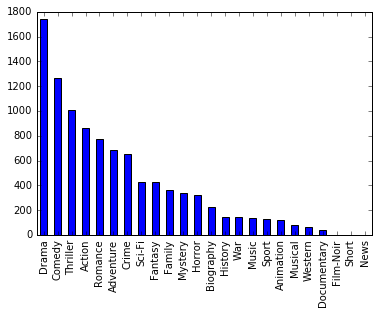

In [41]:
all_genres = pd.Series(imdb.genres.str.split('|').sum())
all_genres.value_counts().plot.bar()

### Solution II

Using Series.str.split() with the _expend=True_ argument, and then using _DataFrame.stack()_ to create a single Series with all the genres.

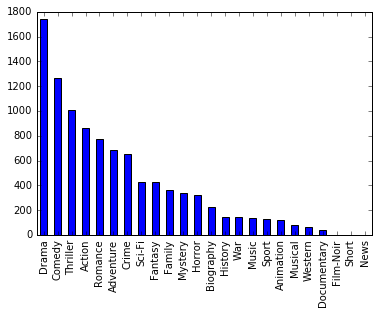

In [42]:
all_genres = imdb.genres.str.split('|', expand=True).stack()
all_genres.value_counts().plot(kind='bar')

### Solution III

Using _Series.str.get_\__dummies()_.

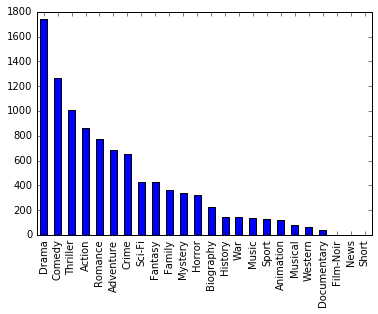

In [85]:
all_genres = imdb.genres.str.get_dummies('|').sum()
all_genres.sort_values(ascending=False).plot(kind='bar')

### Challenge

How many movies are there of each genre **every year**? Visualize it.

In [69]:
def f(grp):
    return pd.Series(grp.genres.str.split('|').sum()).value_counts()

year_genre_counts = imdb.groupby('title_year').apply(f).unstack(fill_value=0)
year_genre_counts.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
title_year,,,,,,,,,,,,,,,,,,,,,
1925.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1934.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1936.0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1938.0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1939.0,0,1,0,0,1,0,0,2,1,1,...,1,0,0,1,0,0,0,0,1,0


For convenience we plot only genres with at least one year with more then 30 movies.

In [78]:
is_common_genre = (year_genre_counts > 30).any()
common_genres = is_common_genre[is_common_genre].index
common_genres

Index([u'Action', u'Adventure', u'Comedy', u'Crime', u'Drama', u'Romance',
       u'Thriller'],
      dtype='object')

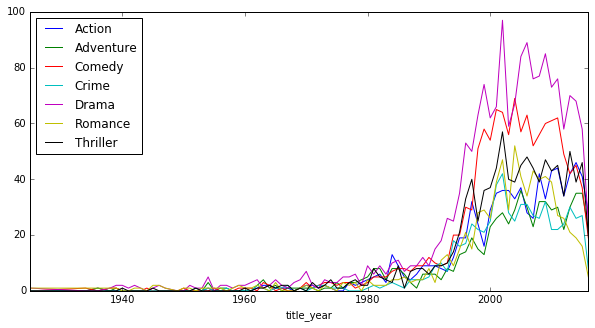

In [79]:
year_genre_counts[common_genres].plot(figsize=(10,5))

## Question 3

Which pairs of director and actor like to work together? Sort the number of co-occurrences of such pairs.

In [29]:
dir_n_act_1 = imdb.groupby('director_name')['actor_1_name'].apply(pd.Series.value_counts)
dir_n_act_2 = imdb.groupby('director_name')['actor_2_name'].apply(pd.Series.value_counts)
dir_n_act_3 = imdb.groupby('director_name')['actor_3_name'].apply(pd.Series.value_counts)

In [30]:
dir_n_act_1 = dir_n_act_1.to_frame()
dir_n_act_all = dir_n_act_1.join(dir_n_act_2, how='outer').join(dir_n_act_3, how='outer')
dir_n_act_all.sum(axis=1).sort_values(ascending=False).head()

director_name                  
Clint Eastwood   Clint Eastwood    10.0
Woody Allen      Woody Allen       10.0
Martin Scorsese  Robert De Niro     7.0
Tim Burton       Johnny Depp        7.0
Dennis Dugan     Adam Sandler       7.0
dtype: float64